In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Dataset.zip'

Archive:  /content/drive/MyDrive/Dataset.zip
  inflating: Dataset/TEST_SET/WATERMELON/125_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/129_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/205_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/134_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/144_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/137_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/189_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/185_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/139_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/206_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/235_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/151_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/207_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/136_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/138_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/186_100.jpg  
  inflating: Dataset/TEST_SET/WATERMELON/176_100.jpg  
  inflating: Dataset

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [ ]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential
import cv2 as cv

In [ ]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))

In [ ]:
train = train_gen.flow_from_directory('/content/Dataset/TRAIN_SET',
target_size=(120, 120),
class_mode='categorical',
batch_size=8)

test = test_gen.flow_from_directory('/content/Dataset/TEST_SET',
target_size=(120, 120),
class_mode='categorical',
batch_size=8)

Found 2626 images belonging to 5 classes.
Found 1055 images belonging to 5 classes.


In [ ]:
print(train.class_indices)
print(test.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}
{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [ ]:
from collections import Counter as c
c(train.labels)


Counter({0: 606, 1: 445, 2: 479, 3: 621, 4: 475})

In [ ]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
#Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#Fitting the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 82s 52ms/step - loss: 1.5241 - accuracy: 0.4423 - val_loss: 1.2508 - val_accuracy: 0.5598
Epoch 2/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.1559 - accuracy: 0.5924 - val_loss: 1.1346 - val_accuracy: 0.6057
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.0161 - accuracy: 0.6440 - val_loss: 1.0267 - val_accuracy: 0.6381
Epoch 4/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.9224 - accuracy: 0.6771 - val_loss: 0.9625 - val_accuracy: 0.6654
Epoch 5/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8551 - accuracy: 0.7026 - val_loss: 0.8840 - val_accuracy: 0.6959
Epoch 6/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.7974 - accuracy: 0.7207 - val_loss: 0.8957 - val_accuracy: 0.6931
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7467 - accuracy: 0.7389 - val_loss: 0.9110 -

In [ ]:
#Saving our model
model.save('nutrition.h5')
#Prediciting our results
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('nutrition.h5')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

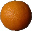

In [ ]:
img = image.load_img('/content/1_100.jpg',target_size=(32,32))
img

In [ ]:
img = image.img_to_array(img)
img

array([[[250., 255., 255.],
        [255., 253., 254.],
        [254., 255., 255.],
        ...,
        [252., 255., 255.],
        [255., 255., 253.],
        [255., 255., 255.]],

       [[255., 253., 254.],
        [255., 253., 245.],
        [251., 255., 254.],
        ...,
        [255., 253., 254.],
        [254., 255., 255.],
        [255., 255., 255.]],

       [[254., 255., 255.],
        [251., 255., 254.],
        [252., 252., 255.],
        ...,
        [251., 255., 254.],
        [254., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[253., 255., 254.],
        [255., 253., 245.],
        [255., 255., 253.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[250., 255., 255.],
        [254., 255., 253.],
        [248., 255., 255.],
        ...,
        [254., 255., 255.],
        [251., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
img = np.expand_dims(img,axis=0)
img

array([[[[250., 255., 255.],
         [255., 253., 254.],
         [254., 255., 255.],
         ...,
         [252., 255., 255.],
         [255., 255., 253.],
         [255., 255., 255.]],

        [[255., 253., 254.],
         [255., 253., 245.],
         [251., 255., 254.],
         ...,
         [255., 253., 254.],
         [254., 255., 255.],
         [255., 255., 255.]],

        [[254., 255., 255.],
         [251., 255., 254.],
         [252., 252., 255.],
         ...,
         [251., 255., 254.],
         [254., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[253., 255., 254.],
         [255., 253., 245.],
         [255., 255., 253.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[250., 255., 255.],
         [254., 255., 253.],
         [248., 255., 255.],
         ...,
         [254., 255., 255.],
         [251., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [ ]:

pred_probabilities = model.predict(img)
pred_classes = np.argmax(pred_probabilities, axis=1)


1/1 [==============================] - 0s 25ms/step


In [ ]:
if pred_classes[0] == 0:
    print("apple")
elif pred_classes[0] == 1:
    print("banana")
elif pred_classes[0] == 2:
    print("mango")
else:
    print("oranges")

oranges
